# **Google Cloud Run Udemy**

## **Unit 1**

### **What will we be doing**

- Start with the **basics** of **Google Cloud Run** (e.g. **containers**, **services** and **divisions**)
- **Deploy Cloud Run Service** (from **creating a service** to **configuring its various settings**)
- **Build** and **secure container images** using **Cloud Build**
- **Integrate Cloud Run Service** with:
    - **Cloud SQL**
    - **Pub/Sub**
    - **Cloud Storage** using **Eventarc**
- Securely enable **Service-to-Service communication**
- Setup **Serverless VPC Connector** and how to setup **direct VPC egress**, so that we can **access resources** in a **VPC network**
- Setup **Blue/Green deployment** to **deploy new versions** of our **Cloud Run Service**
- Deploy **Cloud Run Job** to run a long-running task
- Explore **Sidecar pattern** and see how to use it with the Cloud Run Service

### **VPC Ingress and Egress**

https://medium.com/@reach2shristi.81/vpc-ingress-and-egress-in-aws-f09333e181a1

In the context of a **Virtual Private Cloud** (**VPC**), **ingress** and **egress** refer to the **directions of network traffic into and out of a VPC**, particularly in relation to **firewall rules** or **security groups** that **control access to resources**.

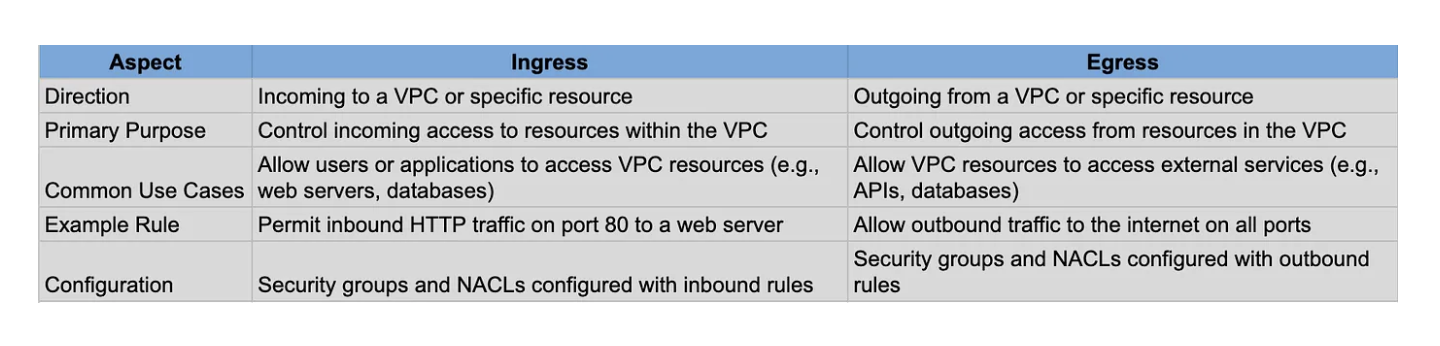

**NACL** = Network Access Control List


## **Unit 3: getting Started**

### **What is Google Cloud Run**
- **Cloud Run** is a **managed compute platform** that let's you **run containers** directly on top of Google's scalable infrastructure

- You can **deploy code written in any programming language** on Cloud Run if you can build a **container image** for it

- **Building cointainer images** is **optional** if you are using Go, Node.js, **Python**, Java, .NET Core or Ruby. You can use **source-based deployment option** that builds the container for you

### **How to run your code on Cloud Run**
- On **Cloud Run,** your **code** can either **run continuously as a service** or as a **job**
- **Cloud Run Services**: used to **run code that responds** to **web requests** or **events**. Services are designed to **run indefinitely**, **listening to HTTP requests**. They are a good candidate for **applications** that need to be **available 24/7**, such as a **web server** or **APIs** or **streaming applications**.
- **Cloud Run Jobs**: used to **run code** that **performs work** (a **job**) and **quits when the work is done**. Run Jobs are designed to **run to completion and then exit**, so they are a good candidate for **applications** that need to **perform a one-time task**, such as **batch processing**, **data migration**, or **machine learning training**. 

### **Cloud Run Service**

- A **Cloud Run Service** is a **stateless container** that is **invocable via HTTP (Hypertext Transfer Protocol) requests**. It is a **fully managed compute platform** that let's you run your code without having to manage servers or infrastructure. Cloud Run Services are a great choice for running stateless containers that need to be **scalable** and **cost effective**.
- Your responsibility is to make sure your **code listens** on a **TCP** (**Transmission Control Protocol**) **port** and **handles HTTP requests**
- Some of the **use cases** for **Cloud Run Services** are: 
    - Host a **web server** for static or dynamic content
    - Host **APIs** for mobile applications, web applications, etc
    - Host **streaming applications**, such as live video streaming or chat applications

A **TCP port** is a **logical number** assigned to a **specific process** or **network service** on a **device**, allowing it to be **uniquely identified on a network**. It is a key part of the **TCP/IP model**, which ensures **reliable data delivery** by **directing packets to the correct application**, such as a web browser or email client, through a **unique combination** of an **IP address** and a **port number**. 

### **Cloud Run Services: Features**

- **Unique HTTPs endpoint** for **every service**: every Cloud Run Service is provided with an HTTPs endpoint on a **unique subdomain** of the `*.run.app` **domain**. You can configure **custom domains** as well. Cloud Run manages **TLS** for you and includes **support** for **WebSockets**, **HTTP/2** (end-to-end) and **gRPC** (end-to-end).
- **Fast request-based auto scaling**: a service can **rapidly scale out** to one thousand instances or even more if you request a quota increase. If demand decreases, Cloud Run **removes idle containers**. You can limit the maximum number of instances.
- **Built-in traffic management**: **every deployment** creates a **new immutable revision**. A **revision** is a **snapshot** of your **container image** and its **environment** at the time of **deployment**. You can **route incoming traffic to the latest revision**, **roll back** to a previous version or **split traffic to multiple revisions** at the same time, to perform a **gradual rollout**. This is useful if you want to reduce the risk of deploying a new revision. You can start with sending 1% of requests to a new revision and increase that percentage while monitoring telemetry.
- **Private and Public Services**: a **Cloud Run service** can be **reachable from the internet**, or you can **restrict access** in 3 ways:
    - **Specify** an **access policy using Cloud IAM** (**Identity and Access Management**). 
        - This is the **most granular way to control access** to your services: you can specify **who can access your service** and **what permissions they have to run it**.
    - Use **ingress settings** to **restrict network access**. This is useful if you want to **allow only internal traffic** from the **VPC** and **internal services** to invoke your Cloud Run Service. 
        - You can specify a l**ist of IP addresses** or **ranges** that are allowed to access your service.
        - You can also **restrict the access** to scenarios when you want your s**ervice to be invoked by a specific event** (e.g. a **PubSub event** or a **Cloud Storage event** or an **Eventarc event**)
    - Allow only **authenticated users** with Cloud **Identity-Aware Proxy** (**IAP**)
        - **IAP** is a **security feature** that allows you to **restrict access** to your Cloud Run Service only to the **authenticated users**. Users must authenticate using their **Google Cloud credentials** before they can access your service.



**TLS**, or **Transport Layer Security**, is a **cryptographic protocol** that **encrypts data** to **secure communication over a network**, such as the internet. It ensures the **privacy**, **integrity**, and **authenticity of data** by **encrypting** it between a **client** (like a web browser) and a **server**. This is commonly seen by users as "`https://`" and a padlock icon in their browser, indicating a secure connection. 

### **Cloud Services Run: Pricing**

- **Pay-per-use pricing**: you only pay for the resources that you end up using
- **Cloud Run** has **two distinct pricing models**:
    - **Request-based**:
        - You pay a **per-request fee**
        - If an instance is not processing requests, the CPU is not allocated and you are not charged
        - Ideal for **services** that **receive bursts of traffic**
        - When a **request is made** to your **Cloud Run Service**, Google will **allocate a container to handle the request**, the **container will run** for the duration of the request and you will be **charged for the CPU time used** by the container while it is running.
        - The **container** runs for the **duration of the request** to Google Cloud Service

    - **Instance-based**:
        - No per-request fee
        - You are **charged for the entire lifetime of an instance and the CPU is always allocated**
        - This is a good option only if:
            - You need to **guarantee** that your **service** will be **available at all times** 
            - if your **service** has a "**cold start**" (i.e. it takes time for it to be ready before it can process requests) and the **requirements** for its **latency** are **very low** (your **service** is **expected to respond in sub-milliseconds**)
        - The **container** will run **for** the **duration of the Google Cloud Service instance**

### **Cloud Run Jobs**

- If your **code performs work and then stops** (a script is a good example), you can use a **Cloud Run job** to run your code
- A **job** can **start one instance to run your code** or you can also start **many identical independent instances in parallel**, that is, an **array job**
- **Array jobs** are a **faster way** to **process jobs** that can be **split into multiple independent tasks**
- The **deployment model** of Cloud Run Jobs is the same as Cloud Run Services: you **provide a container image** that needs to **run** whenever you execute the job. When you execute a Cloud Run Job, behind the scene it creates **tasks** and each task runs an **instance of the container image** that you provided
- For example, if you need to perform a scheduled task at a certain hour every day and you need to run a script --> you can schedule a Cloud Run Job
- Use cases: Run **batch processing jobs**, such as **data analytics** or **machine learning training**

### **Differences between Cloud Run Services and Jobs**

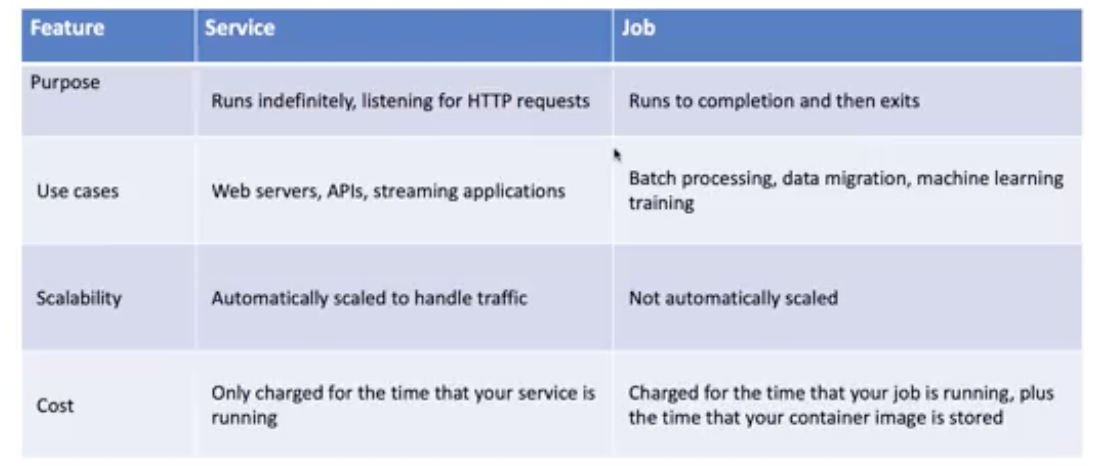

### **Google Cloud Run Integrations**

- **Data Storage**: Cloud Run integrates with Cloud SQL (managed MySQL, PostgreSQL and SQL Server), Memorystore (managed Redis and Memcached), Firestore, CloudSpanner, **Cloud Storage**, etc
- **Logging and error reporting**: **container logs** are **automatically ingested** by **Cloud Logging**. If there are exceptions in the logs, Error Reporting aggregates them and then notifies you
- **Service Identity**: **Every Cloud Run revision is linked to a service account** and the Google Cloud client libraries transparently use this service account to authenticate with Google Cloud APIs
- **Continuous Delivery**: if you store your source code in **Github**, BitBucket or Cloud Service Repositories, you can **configure Cloud Run to automatically deploy new commits** (**continuous delivery**)
- **Private Networking**: Cloud Run instances can **reach resources in the Virtual Private Cloud (VPC) network** through the **serverless VPC access connector**. This is how your service can connect with Compute Engine virtual machines or products based on Compute Engine, such as Google Kubernetes Engine (GKE) or Memorystore
    - There is also a new way to do this which is called **direct VPC egress**

### **Cloud Run Resource Model**
- **Cloud Run Services**:
    - The **service** is the **main resource of Cloud Run**. Each service is located in a **specific Google Cloud Region** (Cloud Run). For redundancy and failover, services are automatically replicated across multiple zones in the region where the are in. A given Google Cloud project can run many services in different regions
    - **Each service exposes** a **unique endpoint** and **automatically scales the underlying infrastructure** to **handle incoming requests**
- **Cloud Run Revisions**:
    - **Each deployment** to a service **creates a revision**. A revision consists of **one or more container images**, along with **environment settings**, such as **environment variables**, **memory limits** or **concurrency value**
    - **Revisions** are **immutable**: once a revision has been created, it **cannot be modified**. For example, when you deploy a container image to a new Cloud Run Service, the first revision is created. If you then deploy a different container image to the same service, a second revision is created. If you subsequently set an environment variable, a third revision is created, etc...
    - This is useful if you want to **reduce the risk of deploying a new revision**: for example, you can start by sending 100% of your request to a new revision and then increase that % when monitoring the telemetry of the new revision. If there are any problems with the new revision, you can always **roll-back to the previous revision** without affecting your users
- **Cloud Run Instances**:
    - **Each revision receiving requests** is **automatically scaled to the number of instances needed to handle all these requests**. Note that the **ingress container** within an instance can receive many requests at the same time. With the **concurrency setting**, you can **set the maximum number of requests that can be sent in parallel** to a **given instance**
        - **Concurrency** is the **ability** of a **system to handle multiple tasks** or **requests** at the **same time**. It can help you to improve the prefromace of your service by preventing it from being overloaded with requests
        - If you set the **concurrency too high**, you may start to see **performance problems** within your application
        - If you set **concurrency too low**, you will have a **higher number of instances of your service** 
        - It is important to **experiment with the concurrency settings** to find the optimal value for your service. You can use **Cloud Run dashboard** to **monitor the performance of your service** and adjust the concurrency.
- **Cloud Run Jobs**: 
    - **Each job** is **located in a specific Google Cloud Region** and **executes one or more containers to completion**. 
    - A job consists of **one or multiple independent tasks that are executed in parallel in a given job execution**
    - **Each task** runs **one container** and might retry it
- **Cloud Run Job Executions**: 
    - When a Job is executed, a **Job Execution is created** in which **all Job tasks are started**.
    - **All tasks in a Job execution must complete successfully** for the Job execution to be successful. Then the **Job Execution** is **destroyed**.
    - You can **set timeouts on tasks and specify the number of retries in case of task failure**. If any task exceeds ts maximum. number of retries, that task is marked as failed and the job is marked as failed
    - By default, **tasks execute in parallel up to a maximum of 100**, but you can specify a lower maximum if any of your backing resources require it 
    - For example, if you have a **Cloud Run Job used to process a large dataset**, you can **split that job into multiple tasks and each of those tasks will process a smaller subset of the dataset**. Those tasks will be executed in parallel, which allow your job to process the entire dataset much faster than if it were processed sequentially




## **Unit 6: Enable required APIs and Services**

**Required APIs**:
- **Artifact Registry API**: the **Artifact Registry** is where we are going to save our **container images**.
    - With **Artifact Registry** you can s**tore and manage your build artifacts** (e.g. **Docker images**, Maven packages, npm packages) in a **scalable** and **integrated repository service** built on Google infrastructure. You can manage repository access with IAM and interact with repositories via gcloud, Cloud Console and native package format tools. The service can also be integrated with **Cloud Build** and **other CI/CD systems**. Artifact Registry abstracts away infrastructure management, so you can focus on what matters most — delivering value to the users of your services and applications. Note: Enabling the Artifact Registry API will not affect your use of Container Registry in the same project.
- C**loud Run Admin API**: we need this to **deploy Cloud Run Services** and **Jobs**.
    - **Run stateless HTTP containers** on a **fully managed environment**. Cloud Run is a **managed compute platform** that enables you to **run stateless containers** that are **invocable via HTTP requests**. Cloud Run is serverless: it abstracts away all infrastructure management, so you can focus on what matters most — building great applications.
- **Identity and Access Management (IAM) API**: used to create IAM resources.
    - **Manages identity** and **access control** for **Google Cloud resources**, including the **creation** of **service accounts**, which you can use to authenticate to Google and make API calls. Enabling this API also enables the IAM Service Account Credentials API (iamcredentials.googleapis.com). However, disabling this API doesn't disable the IAM Service Account Credentials API.
- **Cloud Build API**: Cloud Build, Google Cloud’s **continuous integration (CI) and continuous delivery (CD) platform**, lets you build software quickly across all languages. Get complete control over defining custom workflows for building, testing, and deploying across multiple environments such as VMs, serverless, Kubernetes, or Firebase.
- **Secret Manager API**: Stores sensitive data such as API keys, passwords, and certificates. Provides convenience while improving security.


## **Unit 8: Artifact Registry**

### **What is Artifact Registry?**

- **Artifact Registry** enables you to **centrally store artifacts** and **build dependencies**
- It provides a **single location** for **storing/managing** your **packages** and **Docker container images**
- It allows you to:
    - **Store artifacts** from **Cloud Build**
    - **Deploy artifacts** to **Google Cloud runtimes**, including Google Kubernetes Engine, **Cloud Run**, Compute Engine and App Engine flexible environment
    - **Manage container metadata** and **scan for container vulnerabilites** with **Artifact Analysis** (keep in mind each scan to a container image costs about $0.29, so it can become expensive if you have many container images...)
    - **Enforce deployment policies** with **Binary Authorization**

- You can use **Identity and Access Management** for **access control**